In [1]:
%matplotlib inline


# Boxplot

Shows the use of the functional Boxplot applied to the Canadian Weather
dataset.


In [1]:
# Author: Amanda Hernando Bernabé
# License: MIT

# sphinx_gallery_thumbnail_number = 2

from skfda import datasets
from skfda.exploratory.depth import ModifiedBandDepth, IntegratedDepth
from skfda.exploratory.visualization import Boxplot

import matplotlib.pyplot as plt
import numpy as np

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


First, the Canadian Weather dataset is downloaded from the package 'fda' in
CRAN. It contains a FDataGrid with daily temperatures and precipitations,
that is, it has a 2-dimensional image. We are interested only in the daily
average temperatures, so we will use the first coordinate.



In [2]:
X, y = datasets.fetch_weather(return_X_y=True, as_frame=True)
fd = X.iloc[:, 0].values
fd_temperatures = fd.coordinates[0]

The data is plotted to show the curves we are working with. They are divided
according to the target. In this case, it includes the different climates to
which the weather stations belong to.



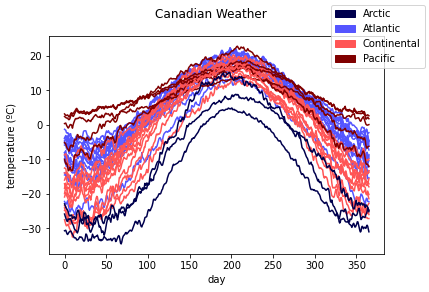

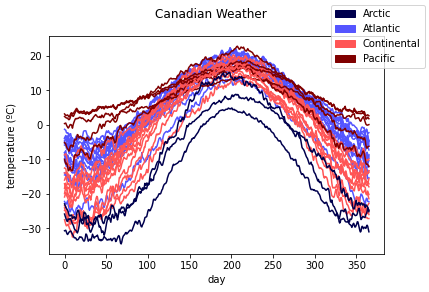

In [3]:
# Each climate is assigned a color. Defaults to grey.
colormap = plt.cm.get_cmap('seismic')
label_names = y.values.categories
nlabels = len(label_names)
label_colors = colormap(np.arange(nlabels) / (nlabels - 1))

fd_temperatures.plot(group=y.values.codes,
                     group_colors=label_colors,
                     group_names=label_names)

We instantiate a :class:`~skfda.exploratory.visualization.Boxplot`
object with the data, and we call its
:func:`~skfda.exploratory.visualization.Boxplot.plot` function to show the
graph.

By default, only the part of the outlier curves which falls out of the
central regions is plotted. We want the entire curve to be shown, that is
why the ``show_full_outliers`` parameter is set to True.



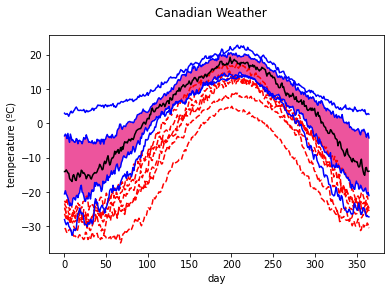

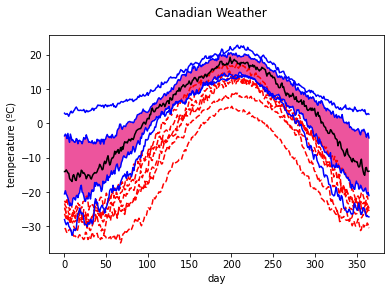

In [4]:
fdBoxplot = Boxplot(fd_temperatures)
fdBoxplot.show_full_outliers = True

fdBoxplot.plot()

We can observe in the boxplot the median in black, the central region (where
the 50% of the most centered samples reside) in pink and the envelopes and
vertical lines in blue. The outliers detected, those samples with at least a
point outside the outlying envelope, are represented with a red dashed line.
The colors can be customized.

The outliers are shown below with respect to the other samples.



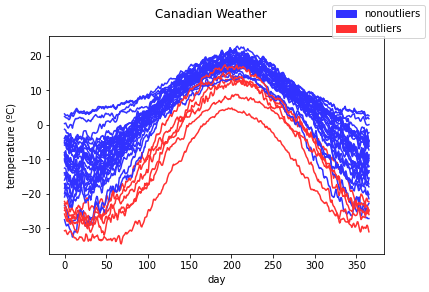

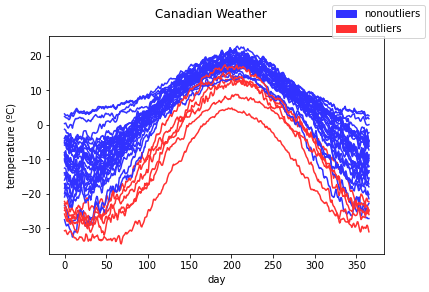

In [5]:
color = 0.3
outliercol = 0.7

fd_temperatures.plot(group=fdBoxplot.outliers.astype(int),
                     group_colors=colormap([color, outliercol]),
                     group_names=["nonoutliers", "outliers"])

The curves pointed as outliers are are those curves with significantly lower
values than the rest. This is the expected result due to the depth measure
used, :func:`~skfda.exploratory.depth.IntegratedDepth`, which ranks
the samples according to their magnitude.

The :class:`~skfda.exploratory.visualization.Boxplot` object admits any
`depth measure <depth-measures>` defined or customized by the user. Now
the call is done with the :class:`~skfda.exploratory.depth.ModifiedBandDepth`
and the factor is reduced in order to designate some samples as outliers
(otherwise, with this measure and the default factor, none of the curves are
pointed out as outliers). We can see that the outliers detected belong to
the Pacific and Arctic climates which are less common to find in Canada. As
a consequence, this measure detects better shape outliers compared to the
previous one.



In [ ]:
fdBoxplot = Boxplot(
    fd_temperatures, depth_method=ModifiedBandDepth(), factor=0.4)
fdBoxplot.show_full_outliers = True

fdBoxplot.plot()

Another functionality implemented in this object is the enhanced functional
boxplot, which can include other central regions, apart from the central or
50% one.

In the following instantiation, the
:func:`~skfda.exploratory.depth.IntegratedDepth` is used and the 25% and
75% central regions are specified.



In [ ]:
fdBoxplot = Boxplot(fd_temperatures, depth_method=IntegratedDepth(),
                    prob=[0.75, 0.5, 0.25])
fdBoxplot.plot()

The above two lines could be replaced just by fdBoxplot inside a notebook
since the default representation of the
:class:`~skfda.exploratory.visualization.Boxplot` is the image of the plot.

